# Домашнее задание 1

__Оценки-баллы__: 
- 1: 1-2
- 2: 3-6
- 3: 7-9
- 4: 10-13
- 5: 14-16
- 6: 17-19
- 7: 20-22
- 8: 23-26
- 9: 27-29
- 10: 30-32

__Литература__: 

- 1) An Introduction to Statistical Learning - облегченная версия следующей книги с небольшим количеством матана, примеры реализованы на R. Электронная версия книги - бесплатная: http://faculty.marshall.usc.edu/gareth-james/

По этой книге также есть онлайн-курс от Стенфорда

- 2)The Elements of Statistical Learning - полный классический учебник по статистическому обучению, много математики. Книга, кстати, тоже бесплатна для скачивания: https://web.stanford.edu/~hastie/ElemStatLearn//


__DL (срок сдачи ДЗ)__: 15.10.2021 23:59. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw1_3_ivanov_i_i.ipynb

### Описательные статистики

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

%matplotlib inline

sns.set_theme()
plt.rcParams['figure.figsize'] = [10, 10]

Подгрузим данные и посмотрим на первые пять строчек из таблицы.

In [2]:
df = pd.read_csv('./vk_main.csv', sep='\t')
df.head()

,city,country,first_name,home_town,in_hse_memes_group,is_bmm,is_closed,last_name,likes_memes,uid,...,photo_month_mean,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text_len_cnt,photo_ava_change_cnt,photo_text_url_len_cnt,friends_from_course_cnt,friends_mail_from_course_pct
0,Москва,Россия,Александра,Москва,True,True,False,Абашкова,60.0,182152789,...,1.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,42.0,0.428571
1,Рязань,Россия,Анастасия,Рязань,True,True,False,Чуфистова,0.0,148020433,...,2.375000,2.0,1.0,0.105263,0.0,0.0,0.0,0.0,32.0,0.281250
2,Москва,Россия,Александр,Омск,False,True,False,Головачев,0.0,138413935,...,1.400000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,32.0,0.406250
3,NaN,NaN,Анна,NaN,False,True,False,Лобанова,0.0,366261055,...,4.166667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,45.0,0.333333
4,NaN,Россия,Алексей,NaN,True,True,False,Пузырный,21.0,111252392,...,3.181818,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,41.0,0.341463


#### Задание 1 [2]

В переменной `wall_text` лежат тексты со стен всех пользователей.

* Постройте распределение длин для всех стен. 
* Сколько людей написали на своей стенке хотя бы раз название своего вуза?


In [3]:
df.wall_text.head()

0         Давай поговорим о личном   Буду вашим кот...
1        Лучший фотограф😻😻        ой,  может даже у...
2    🚀 [id18115779|Баха], спасибо за атмосферу 🌌 \n...
3    Не проходите мимо! Приходите к нам! Ждём всех!...
4    Нам пора признать, что зимний сезон следует сд...
Name: wall_text, dtype: object

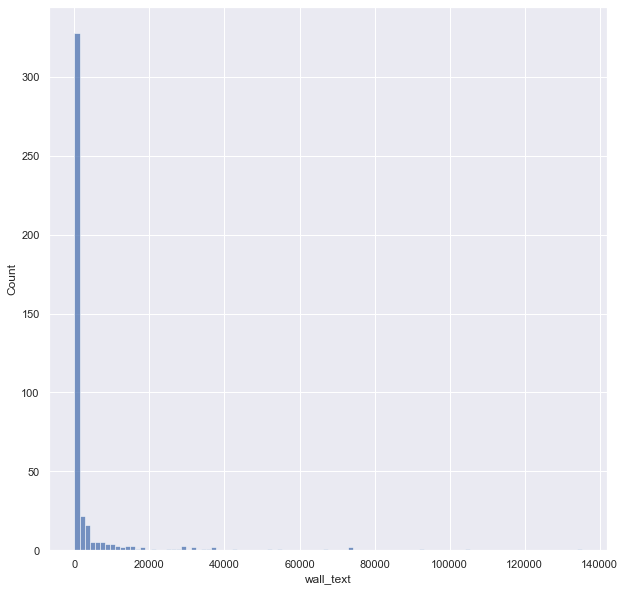

In [4]:
texts_len = df.wall_text.astype(str).map(len)
sns.histplot(texts_len, bins=100)
plt.show()

Очевидно, большая часть постов vk содержит мало символов.

In [5]:
texts_len.describe()

count       425.000000
mean       3772.357647
std       12992.475452
min           1.000000
25%           3.000000
50%          51.000000
75%         900.000000
max      135227.000000
Name: wall_text, dtype: float64

При максимальном значении в сотню тысяч символов медиана примерно равна 50.
Посмотрим на распределение 75% данных (длина < 900 символов)

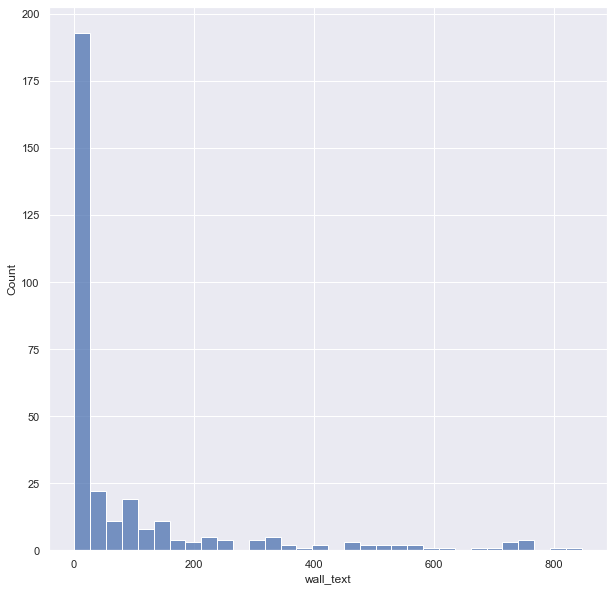

In [6]:
sns.histplot(texts_len[texts_len < texts_len.quantile(0.75)])
plt.show()

Похоже на экспоненциальное распределение.

Теперь посчитаем, в скольки текстах упоминается названия вуза (у нас же все студенты из ВШЭ, правильно?)

In [7]:
hse_names = ['вшэ', 'вышка', "высшая школа экономики", "hse", "higher school of economics"]
occurrence_cnt = df.wall_text.astype(str).map(
    lambda text: any(hse in text.lower() for hse in hse_names)
).sum()
print("Страниц с упоминанием ВШЭ:", occurrence_cnt)

Страниц с упоминанием ВШЭ: 10


#### Задание 2 [1]

Вывести имена самых больших любителей мемов (топ 1\% значений по колонке `likes_memes`. Итоговую табличку отсортировать по числу оставленных в группе лайков.

In [8]:
threshold = df.likes_memes.quantile(0.99)
df[df.likes_memes >= threshold][['likes_memes', 'photo_like_cnt']].sort_values('photo_like_cnt')

,likes_memes,photo_like_cnt
134,1081.0,18.0
205,440.0,209.0
189,398.0,2013.0
363,685.0,2954.0


#### Задание 3 [1]

Построить гистограммы для параметров `wall_emoji_cnt` (число эмодзи на стене у человека) и `wall_comment_cnt` (число коментов на стене у человека). Где больше выбросов?

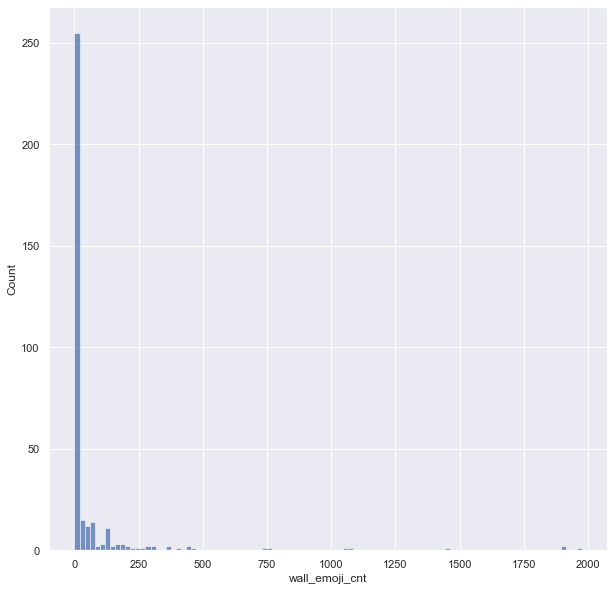

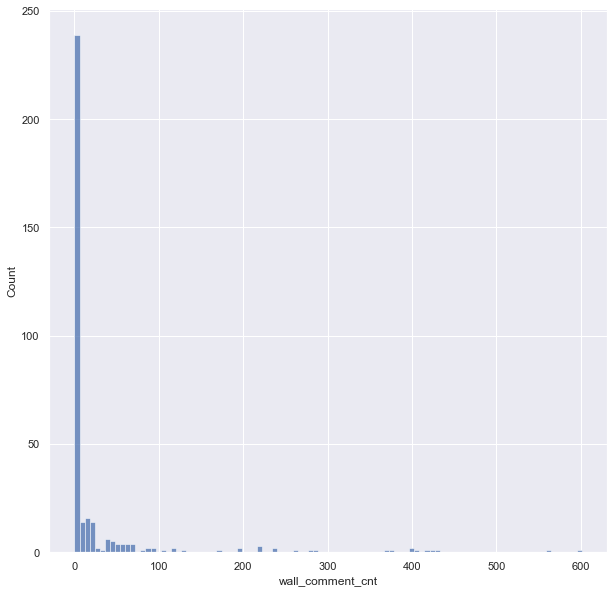

In [9]:
sns.histplot(df.wall_emoji_cnt, bins=100)
plt.show()

sns.histplot(df.wall_comment_cnt, bins=100)
plt.show()

Посмотрим, где должны располагаться границы выбросов, с помощью "ящика с усами",
выкинув явно большие (судя по гистограмме) значения.

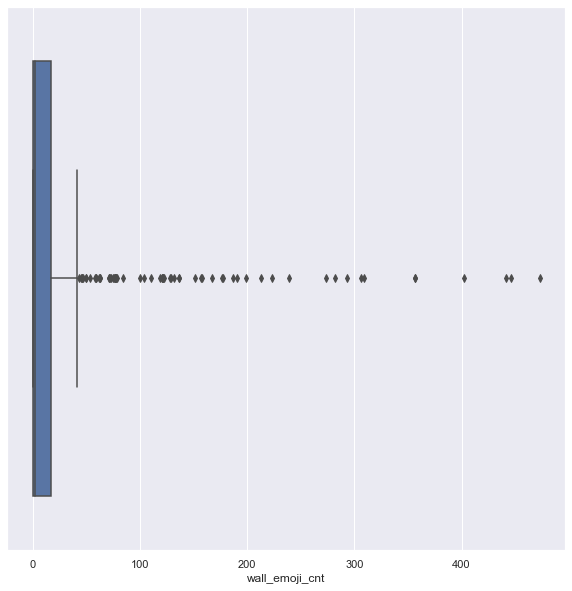

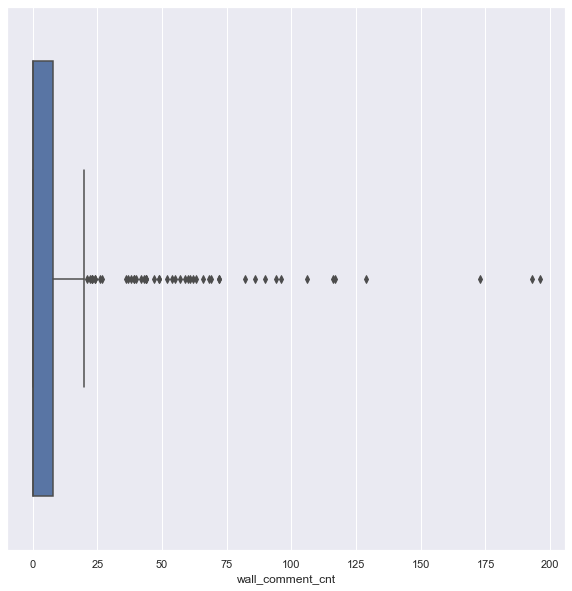

In [10]:
sns.boxplot(x=df.wall_emoji_cnt[df.wall_emoji_cnt < 500])
plt.show()

sns.boxplot(x=df.wall_comment_cnt[df.wall_comment_cnt < 200])
plt.show()

Посчитаем границы выбросов явно по формуле для всей выборки

In [11]:
emoji_threshold = df.wall_emoji_cnt.quantile(0.75) * 2.5 - 1.5 * df.wall_emoji_cnt.quantile(0.25)
comment_threshold = df.wall_comment_cnt.quantile(0.75) * 2.5 - 1.5 * df.wall_comment_cnt.quantile(0.25)

print("emoji_threshold:", emoji_threshold)
print("comment_threshold:", comment_threshold)

emoji_threshold: 53.75
comment_threshold: 35.0


Теперь посчитаем, сколько значений осталось за границами выбросов

In [12]:
emoji_outlier_cnt = (df.wall_emoji_cnt > emoji_threshold).sum()
comment_outlier_cnt = (df.wall_comment_cnt > emoji_threshold).sum()

print("emoji_outlier_cnt:", emoji_outlier_cnt)
print("comment_outlier_cnt:", comment_outlier_cnt)

emoji_outlier_cnt: 65
comment_outlier_cnt: 43


У emoji выбросов больше, но ненамного. Порядок тот же.

Сравните для обоих показателей средние с медианами. Какие выводы о хвостах распределений и выборосах можно сделать из этого сравнения?

In [13]:
print("wall_emoji_cnt:\n", df.wall_emoji_cnt.describe(), "\n", sep='')
print("wall_comment_cnt:\n", df.wall_comment_cnt.describe(), "\n", sep='')

wall_emoji_cnt:
count     343.000000
mean       62.909621
std       226.657483
min         0.000000
25%         0.000000
50%         2.000000
75%        21.500000
max      1975.000000
Name: wall_emoji_cnt, dtype: float64

wall_comment_cnt:
count    343.000000
mean      29.632653
std       84.781448
min        0.000000
25%        0.000000
50%        0.000000
75%       14.000000
max      601.000000
Name: wall_comment_cnt, dtype: float64



У emoji разница среднего и медианы больше, чем у comment,
поэтому хвост распределения должен быть больше, как и количество выбросов.
Хотя на этом примере различие не такое явное.

#### Задание 4 [1]

Посчитайте соотношение полов в направлениях по маркетингу и менеджменту (`is_bmm` - с маркетинга - $1$, с менеджмента - $0$). Проинтерпретируйте итоговые показатели. Где больше парней? Во сколько раз?

In [14]:
tab = pd.crosstab(df.is_bmm, df.male_dummy)
tab

male_dummy,0,1
is_bmm,,
False,118,145
True,112,50


In [15]:
tab[0].values.tolist()

[118, 112]

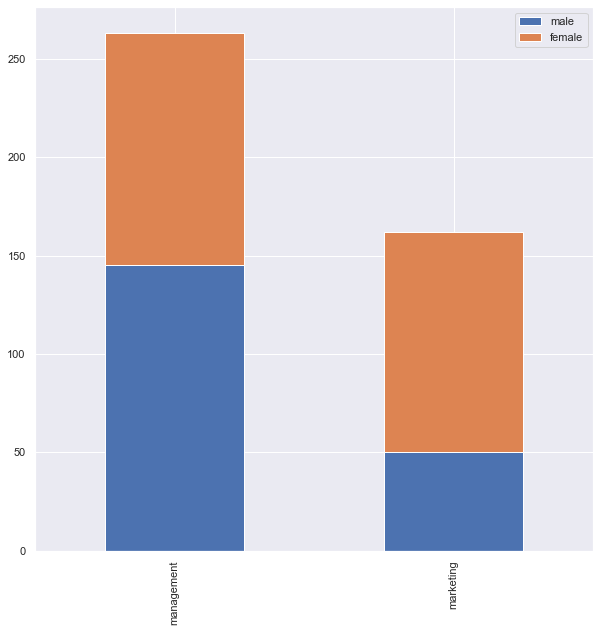

In [16]:
female = tab[0].values.tolist()
male = tab[1].values.tolist()
index = ['management', 'marketing']

pd.DataFrame({'male': male, 'female': female}, index=index).plot.bar(stacked=True)
plt.show()

**Выводы**
- На менеджмент идет в полтора раза больше студентов
- Среди студентов маркетинга девушек больше (около 70%), у менеджеров - примерно поровну
- Парней на менеджменте примерно в 3 раза больше, чем на маркетинге

#### Задание 5 [2]

Каждый студент добавляет к себе в друзья людей со своего потока. В переменной `friends_mail_from_course_pct` записана доля парней-друзей с потока (то, что переменная называется не `male` - опечатка).

Постройте гистограмму для распределения доли парней в друзьях для девушек и для парней. Обе гистограммы постройте на одной картинке. 

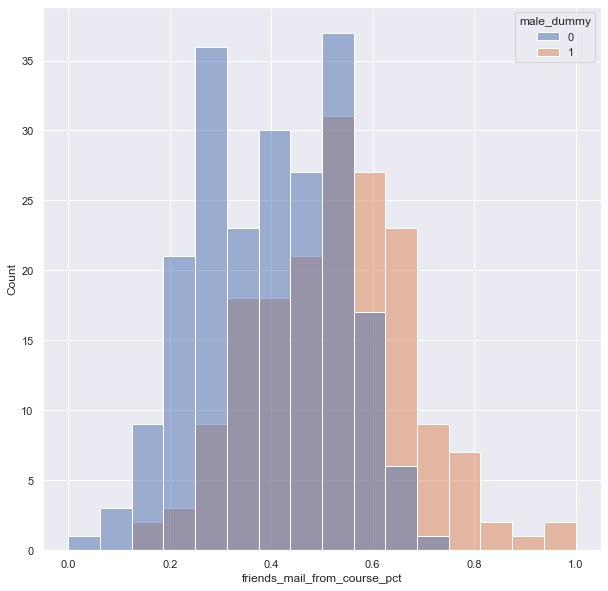

In [17]:
# sns.histplot(df[df.male_dummy == True].friends_mail_from_course_pct, color="blue")
# sns.histplot(df[df.male_dummy == False].friends_mail_from_course_pct, color="pink")

sns.histplot(data=df, x='friends_mail_from_course_pct', hue='male_dummy')
plt.show()

Посчитайте для обеих групп среднее и дисперсию. Какие выводы вы можете сделать на основе посчитанных статистик?

In [18]:
df.groupby('male_dummy')['friends_mail_from_course_pct'].describe().loc[:, ['mean', 'std']]

,mean,std
male_dummy,,
0,0.391522,0.140071
1,0.523007,0.153287


Распределения у обеих групп похожи и имеют близкую дисперсию, но для парней есть смещение вправо
(среднее больше, чем для девушек).

**Вывод**: парни дружат vk с парнями больше, чем девушки.

#### Задание 6 [3]

Давайте проанализируем колонку со средним кол-во фото в месяц (`photo_month_mean`)

* Постройте на одной картинке гистограмы для распределения этого показателя по разным полам. 
* Правда ли, что типичная девушка выкладывает значительно больше фотографий, чем типичный мужчина? (подумайте какой именно показатель типичности нужно выбрать для сравнения и обоснуйте почему)
* Для какого пола показатель оказывается более непредсказуемым? (подумайте как именно корректно эту непредсказуемость оценить, обычное стандартное отклонение явно не подходит)

Не забывайте подгрузить пакет `matplotlib`!  Все свои рассуждения пишите прямо по ходу кода

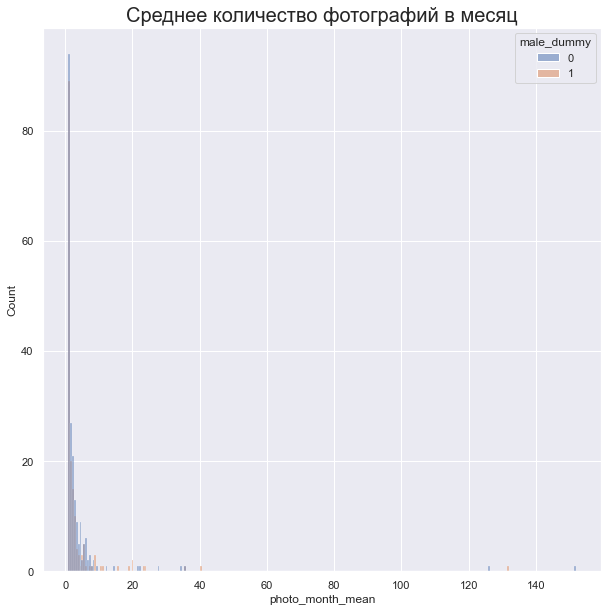

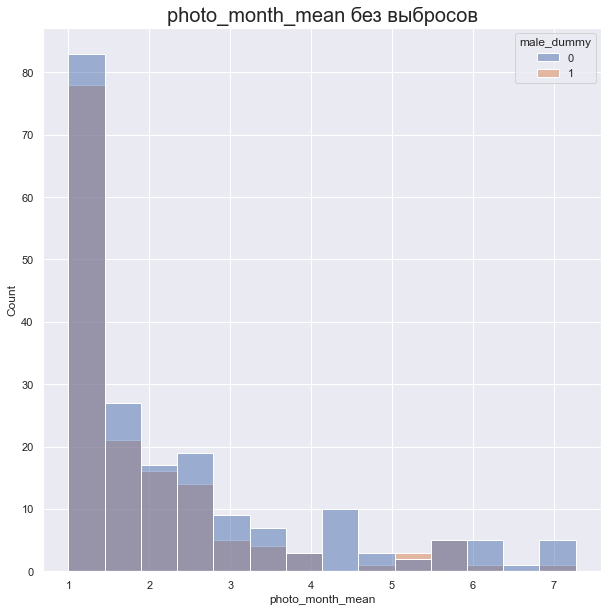

In [19]:
sns.histplot(data=df, x="photo_month_mean", hue="male_dummy")
plt.title("Среднее количество фотографий в месяц", size=20)
plt.show()

# без выбросов:
sns.histplot(data=df[df['photo_month_mean'] < 8], x="photo_month_mean", hue="male_dummy")
plt.title("photo_month_mean без выбросов", size=20)
plt.show()

* Судя по гистрограмме, средние значения для парней и девушек распределены одинаково, просто девушек больше на 3-5 в каждом столбце гистограммы без выбросов.

In [20]:
print("male:\n", df[df['male_dummy'] == True].photo_month_mean.describe(), "\n", sep="")
print("female:\n", df[df['male_dummy'] == False].photo_month_mean.describe(), sep="")

male:
count    167.000000
mean       4.040629
std       11.327306
min        1.000000
25%        1.000000
50%        1.500000
75%        2.683333
max      131.416667
Name: photo_month_mean, dtype: float64

female:
count    209.000000
mean       4.453513
std       14.076101
min        1.000000
25%        1.000000
50%        1.750000
75%        3.333333
max      151.833333
Name: photo_month_mean, dtype: float64


**Выводы**

* В качестве показателя типичной девушки / парня можно рассмотреть как медиану, так и среднее. Оба значения мало отличаются. Типичная девушка действительно выкладывает больше фотографий, но незначительно.
* Непредсказуемость можно оценить по распределению. Гистограммы парней и девушек очень похожи, но девушек просто больше, поэтому уверенности в их точности данных у нас больше. Показатель парней мне кажется более непредсказуемым.

In [21]:
### Визуализация

У всех нас есть датасет по контакту. В нём лежит информация про всех нас. Эту информацию надо как следует проанализировать. 

В большинстве заданий для получения баллов придётся не только завести код, но и написать свои мысли в поле Ответ. Сочинения надо писать прямо в текстовых ячейках, сразу после слова Ответ.

Для начала подгрузите все необходимые библиотеки: math, numpy, pandas, matplotlib.pyplot, seaborn и включите опцию, отвечающую за прорисовку картинок прямо в тетрадке.

In [22]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Подгрузите данные профилей и данные по фотографиям

In [23]:
# В этой табличке лежат данные по профилю человека
df_profile = pd.read_csv('./vk_data_profile.csv',sep='\t')

# В этой табличке лежат данные по фотографиям человека
df_photo = pd.read_csv('./vk_data_photo.csv',sep='\t')

Склеим табличку по полю uid

In [24]:
df = pd.merge(df_profile, df_photo, how='right', on='uid')
df.head()

,Unnamed: 0_x,uid,Unnamed: 0.1,first_name,last_name,is_closed,city,home_town,male_dummy,relation_cat,...,photo_repost_cnt,photo_repost_max,photo_repost_mean,photo_repost_median,photo_text,photo_text_len_cnt,photo_yer_mean,vk_photo_ava_change_cnt,vk_photo_text_url_len_cnt,vk_photo_wall_ph_post_cnt
0,0,182152789,0,Александра,Абашкова,False,Москва,Москва,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,1.333333,0.0,0.0,0.0
1,1,148020433,1,Анастасия,Чуфистова,False,Рязань,Рязань,0,не указано,...,2.0,1.0,0.105263,0.0,,0.0,3.166667,0.0,0.0,0.0
2,2,138413935,2,Александр,Головачев,False,Москва,Омск,1,не женат/не замужем,...,0.0,0.0,0.000000,0.0,,0.0,2.333333,0.0,0.0,0.0
3,3,366261055,3,Анна,Лобанова,False,NaN,NaN,0,не указано,...,0.0,0.0,0.000000,0.0,,0.0,12.500000,0.0,0.0,0.0
4,4,111252392,4,Алексей,Пузырный,False,NaN,NaN,1,NaN,...,0.0,0.0,0.000000,0.0,,0.0,8.750000,0.0,0.0,0.0


Давайте посмотрим на все названия колонок, которые есть в таблице.

In [25]:
df.columns

Index(['Unnamed: 0_x', 'uid', 'Unnamed: 0.1', 'first_name', 'last_name',
       'is_closed', 'city', 'home_town', 'male_dummy', 'relation_cat',
       'relation_partner', 'byear', 'bmonth', 'bday', 'country',
       'facebook_dummy', 'instagram_dummy', 'skype_dummy', 'twitter_dummy',
       'home_phone_dummy', 'mobile_phone_dummy', 'site_dummy', 'folowers_cnt',
       'university_str', 'faculty_str', 'about_str', 'activities_str',
       'books_str', 'interests_str', 'movies_str', 'music_str', 'quotes_str',
       'tv_str', 'games_str', 'can_post_dummy', 'can_see_all_posts_dummy',
       'can_see_audio_dummy', 'can_write_private_message_dummy',
       'has_mobile_dummy', 'has_ava_dummy', 'wall_comments_dummy',
       'albums_cnt', 'audio_cnt', 'followers_cnt', 'friends_cnt', 'gifts_cnt',
       'groups_cnt', 'mutual_friends_cnt', 'photos_cnt', 'subscriptions_cnt',
       'user_photos_cnt', 'videos_cnt', 'pages_cnt', 'alco_love_cat',
       'smoke_love_cat', 'religion_str', 'inspired_by

Мы видим, что часть из них кончается на `cnt`. Это колонки-счётчики. В них лежат такие переменные, как количество фоток, лайков, репостов и тд

In [26]:
variables_cnt = [item for item in df.columns if item[-3:] == 'cnt']
variables_cnt

['folowers_cnt',
 'albums_cnt',
 'audio_cnt',
 'followers_cnt',
 'friends_cnt',
 'gifts_cnt',
 'groups_cnt',
 'mutual_friends_cnt',
 'photos_cnt',
 'subscriptions_cnt',
 'user_photos_cnt',
 'videos_cnt',
 'pages_cnt',
 'lang_cnt',
 'change_city_school_cnt',
 'schools_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

Разберитесь, как работает и устроен этот цикл, если вы ещё не разбираетесь. Почитать об этом можно [вот тут.](https://habr.com/ru/post/30232/) Чуть ниже вам предстоит написать свой.

#### Задание 7 [2]

Вытащите из переменных счётчиков только те, которые отвечают за фото.__ Постройте для них гистограммы (для удобства используйте логарифмическое скалирование). Как думаете, в каких переменных есть выбросы? Какие из переменных неинформативны? Почему?


__Ответ:__

In [27]:
photos_var_cnt = [item for item in variables_cnt if 'photo' in item]  # сохраните нужные названия столбцов сюда
photos_var_cnt

['photos_cnt',
 'user_photos_cnt',
 'photo_cnt',
 'photo_like_cnt',
 'photo_repost_cnt',
 'photo_text_len_cnt',
 'vk_photo_ava_change_cnt',
 'vk_photo_text_url_len_cnt',
 'vk_photo_wall_ph_post_cnt']

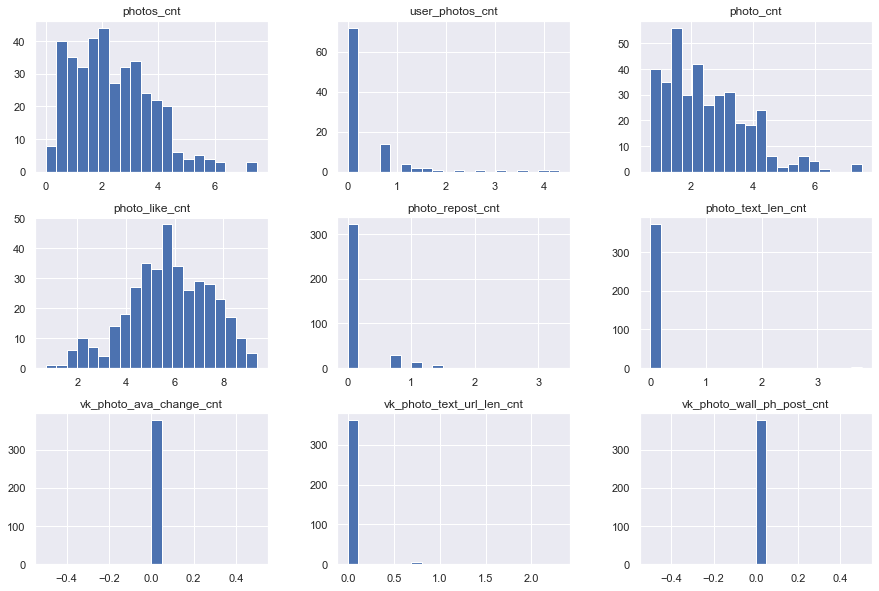

In [28]:
np.log(df[photos_var_cnt] + 1).hist(figsize=(15, 10), bins=20)
plt.show()

**Выводы**
* photo_text_len_cnt, vk_photo_ava_change_cnt, vk_photo_text_url_len_cnt, vk_photo_wall_ph_post_cnt - неинформативные фичи, потому что принимают одинаковое значение для всех элементов выборки.
* user_photos_cnt, photo_reposts_cnt - сложные для анализа фичи, потому что для большинства элементов выборки принимают одинаковое значение, но остальные элементы нельзя назвать выбросом, потому что их достаточно много, и они имеют какое-то распределение.

#### Задание 8 [2]

Кто больше постит фотографий, девушки или парни? Чьи фото собирают больше лайков? (общее количество лайков, медиана и среднее)

Вы уже до этого искали ответы на подобные вопросы. Тут от вас требуется построить картинку, на которой будет чётко видно, что происходит с женщинами, а что с мужчинами (своя гистограмма для каждой фичи, раскрашенная по мужчинам и женщинам). Попробуйте построить все $4$ картинки в рамках одной с помощью `axis`.

In [29]:
photos_var_cnt = ['photo_cnt', 'photo_like_cnt', 'photo_like_median', 'photo_like_mean']
df_male = df[df.male_dummy == True]
df_female = df[df.male_dummy == False]

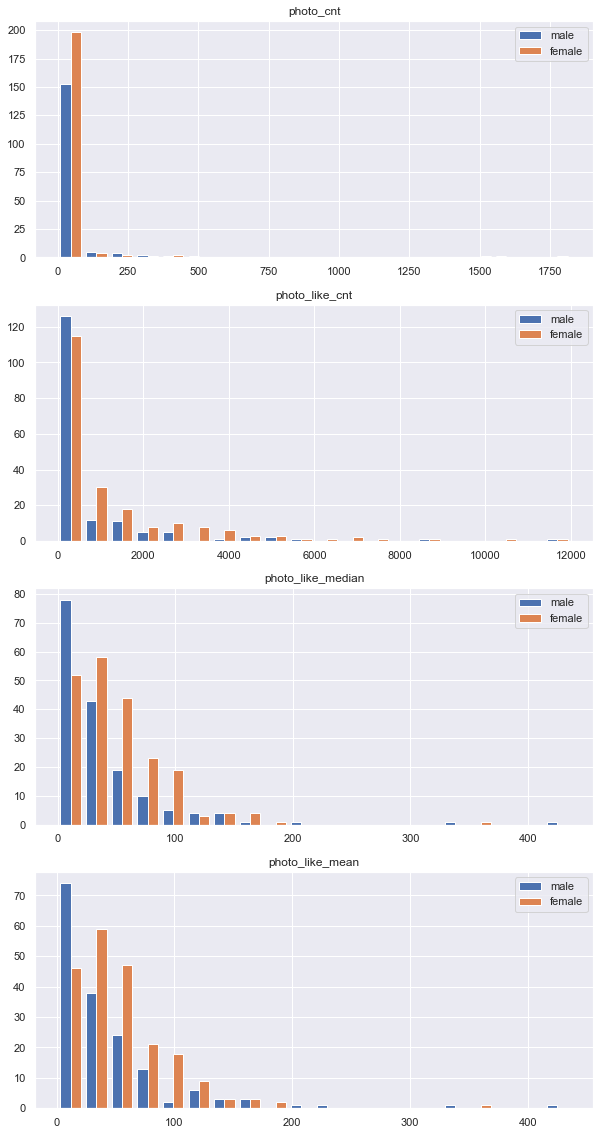

In [30]:
fig, axs = plt.subplots(4, figsize=(10, 20))
for i, feature in enumerate(photos_var_cnt):
    axs[i].hist([df_male[feature], df_female[feature]], bins=20, label=['male', 'female'])
    axs[i].title.set_text(feature)
    axs[i].legend()

Давайте добавим к нашим переменным (описывающим фотографии) количество друзей, количество подарков и пол

In [31]:
vars_interesting = photos_var_cnt + ['male_dummy', 'friends_cnt', 'gifts_cnt']

In [32]:
df[vars_interesting].head()

,photo_cnt,photo_like_cnt,photo_like_median,photo_like_mean,male_dummy,friends_cnt,gifts_cnt
0,4.0,309.0,72.0,77.250000,0,298.0,NaN
1,19.0,2894.0,152.0,152.315789,0,408.0,203.0
2,7.0,2406.0,328.0,343.714286,1,2969.0,NaN
3,50.0,1310.0,25.0,26.200000,0,214.0,24.0
4,35.0,1375.0,19.0,39.285714,1,336.0,227.0


#### Задание 9 [2]

Визуализируйте вытащенные признаки попарно. Постройте `pairplot` для всех пар. На диагонали расположите оценки плотностей для признаков. Для этого используйте опцию `diag_kind = 'kde'`. С помощью параметра `hue` разбейте все наблюдения на мужские и женские, чтобы они отражались на картинках разными цветами.

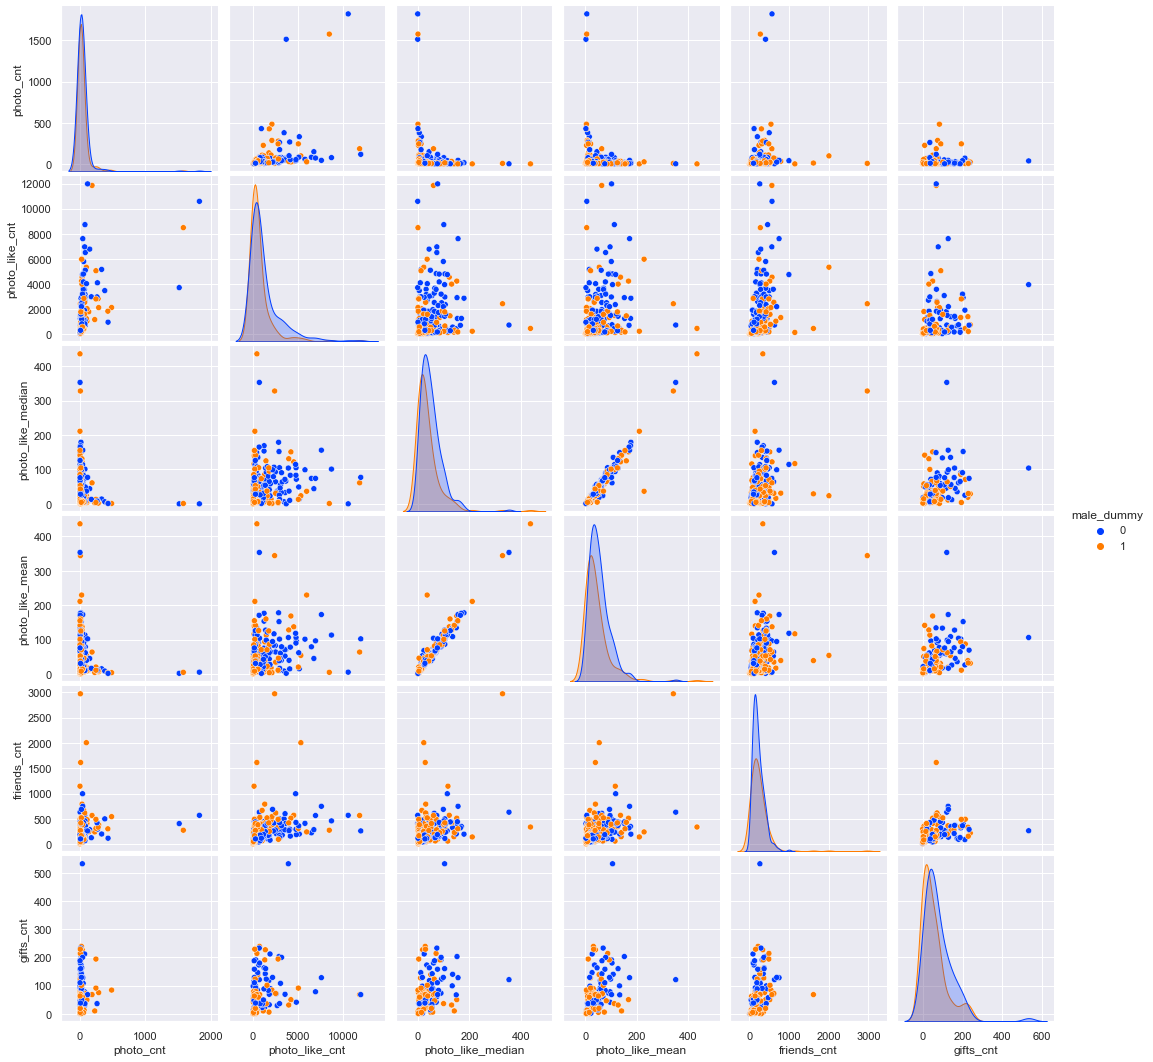

In [33]:
sns.pairplot(df[vars_interesting], diag_kind='kde', hue="male_dummy", palette='bright', kind='scatter')

Давайте для удобства визуализации прологарифмуем наш датасет (предварительно заполнив пропуски нулями или выкинув их)

In [34]:
df_na_zero = df[vars_interesting].fillna(0)

for column in df_na_zero.columns:
    if column == 'male_dummy':
        continue
    df_na_zero[column] = df_na_zero[column].map(lambda x: math.log(1 + x))

Постройте pairplot для датасета df_na_zero

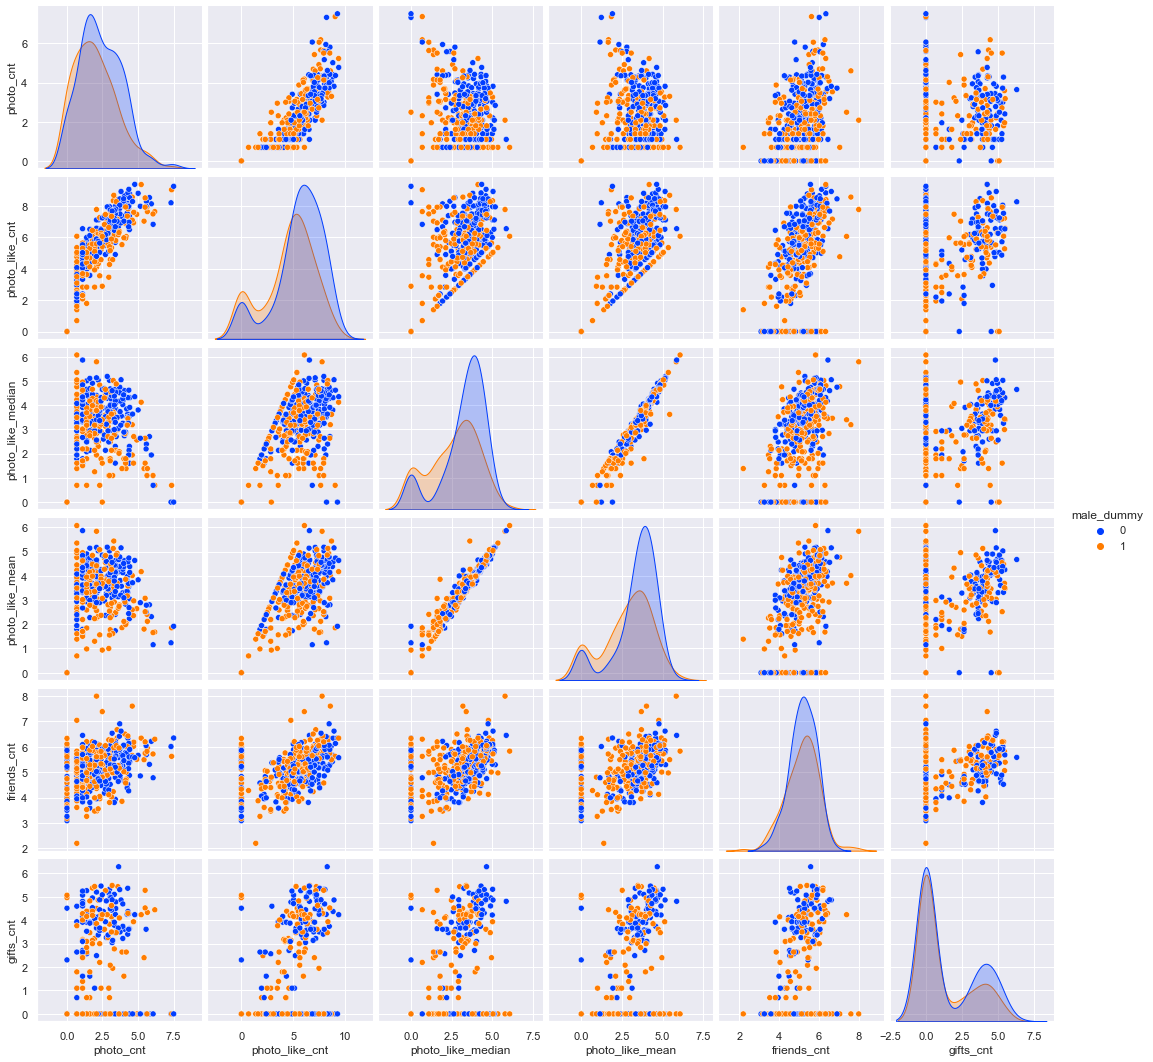

In [35]:
sns.pairplot(df_na_zero, diag_kind='kde', hue="male_dummy", palette='bright', kind='scatter')
plt.show()

#### Задание 10 [1]

Сделайте датасет df_na_drop. Для этого проделайте всё то же самое, что выше, но вместо того, чтобы заполнять пропуски нулями - выбросите их.

In [36]:
# создание датасета для df_na_drop

df_na_drop = df[vars_interesting].dropna()

for column in df_na_drop.columns:
    if column == 'male_dummy':
        continue
    df_na_drop[column] = df_na_drop[column].map(lambda x: math.log(1 + x))

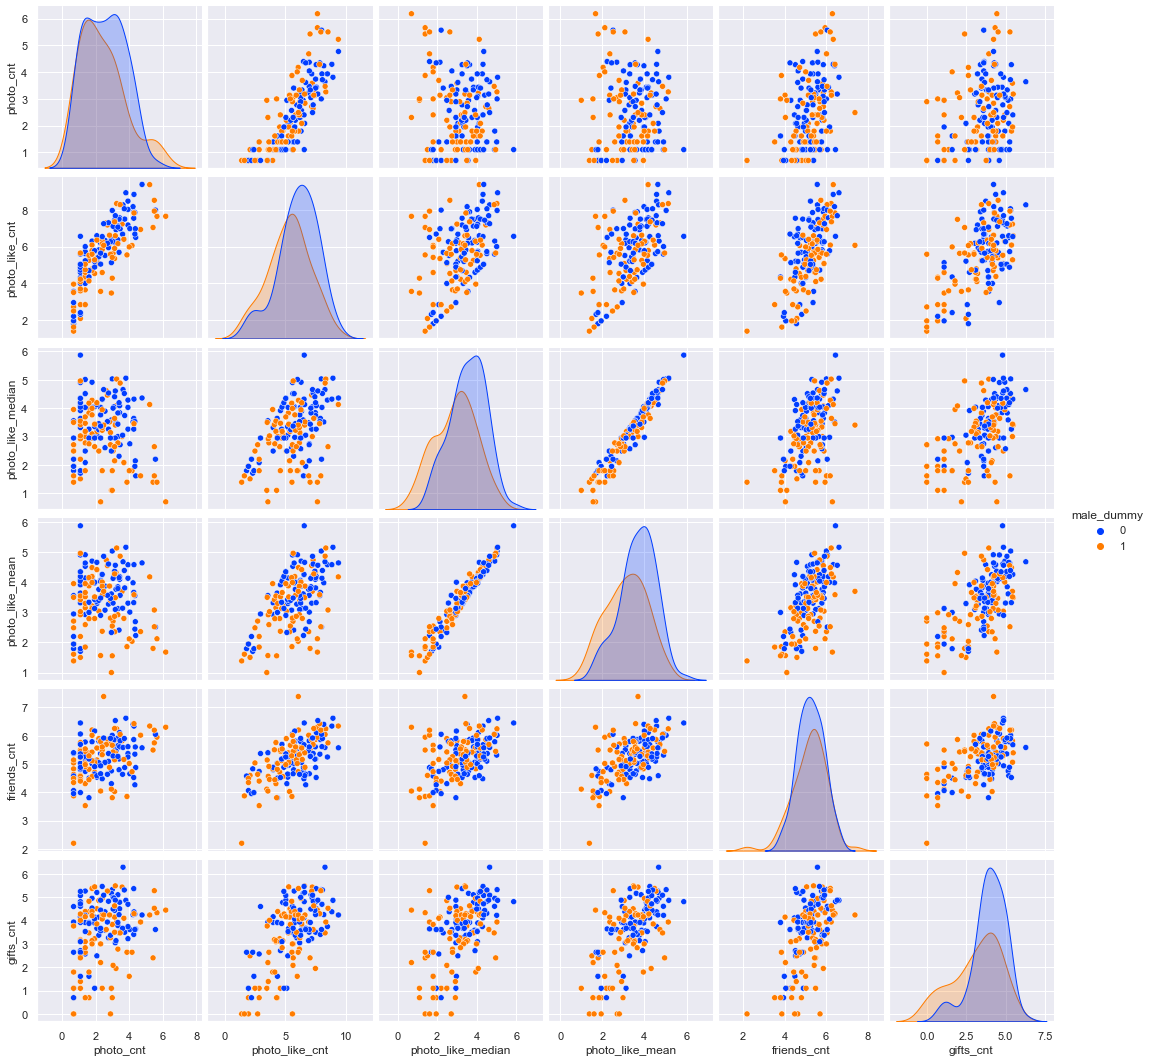

In [37]:
# постройте pairplot для датасета df_na_drop

sns.pairplot(df_na_drop, diag_kind='kde', hue="male_dummy", palette='bright')
plt.show()

#### Задание 11 [3]

Дайте ответы на следущие вопросы. Свои мысли пишите прямо здесь!

1. Между какими признаками скорее всего есть линейная зависимость? Почему вы так решили?

__Notes:__

- Последний график (с dropna) кажется самым информативным, буду делать выводы по нему.
- Линейную зависимость на графике pairplot видно, если точки располагаются близко к какой-то линии.

__Ответ:__

- photo_like_median и photo_like_mean имеют линейную зависимость.
- photo_cnt, photo_like_cnt имеют близкую к линейной зависимость: чем больше фото, тем больше лайков.
- photos_like_cnt, friends_cnt имеют зависимость, близкую к линейной: чем больше друзей, тем больше лайков.
- gifts_cnt имеет линейную зависимость с friends_cnt: чем больше друзей, тем больше подарков.

По транзитивности можно сказать, что все эти признаки: ['photo_cnt', 'photo_like_cnt', 'friends_cnt', gifts_cnt'] имеют линейную зависимость.

* Есть ли тут нелинейные зависимости?

__Ответ:__

photo_like_median и photo_like_mean , наверное, имеют какую-то зависимость с остальными признаками, но она точно не линейная.

* Есть ли объекты-выбросы, которые наблюдаются далеко от сгустков из точек?

__Ответ:__  

На первом графике (до логарифмирования) выбросы есть. Это может быть что угодно: огромное количество друзей при маленьком количестве фотографий (какой-нибудь бот или активист), или множество фотографий при ничтожном количестве лайков и друзей (например, пользователь использует вк, чтобы хранить все свои фотографии)

На прологарифмированном графике выбросы сглаживаются.

* Какие ещё интересные особенности вы видите на картинке?

__Ответ:__  

- Логарифмирование очень помогло, потому что на первом графике почти все точки сбивались очень близко к нулю или одной из осей, сложно было делать выводы.
- У логарифмированных признаков распределение похоже на нормальное.
- dropNa работает лучше, потому что fillNa(0) смещает распределение к нулю.

#### Задание 12 [2]

Отлично! Половина домашки осталась позади. Давайте теперь для тех же самых признаков построим матрицу корреляций и провизуализируем её с помощью `heatmap`.

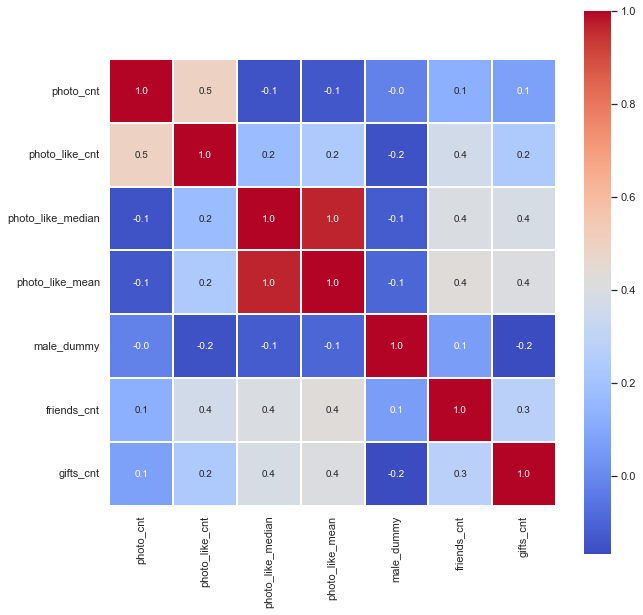

In [38]:
# Тут нужна картинка для датасета df[vars_interesting]

plt.figure(figsize=(10, 10))
sns.heatmap(df[vars_interesting].corr(method='pearson'),
            square = True,
            annot = True,
            fmt=".1f",
            linewidths=0.1,
            cmap="coolwarm"
            );

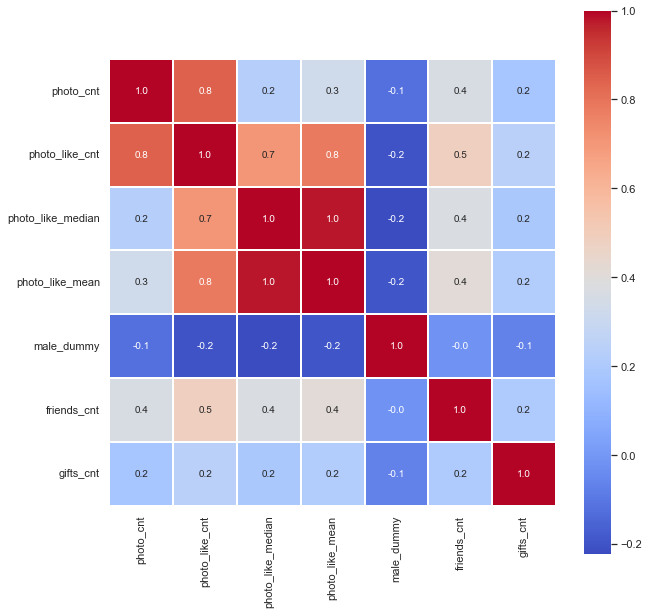

In [39]:
# Тут нужна картинка для датасета df_na_zero[vars_interesting]

plt.figure(figsize=(10, 10))
sns.heatmap(df_na_zero[vars_interesting].corr(method='pearson'),
            square = True,
            annot = True,
            fmt=".1f",
            linewidths=0.1,
            cmap="coolwarm"
            );

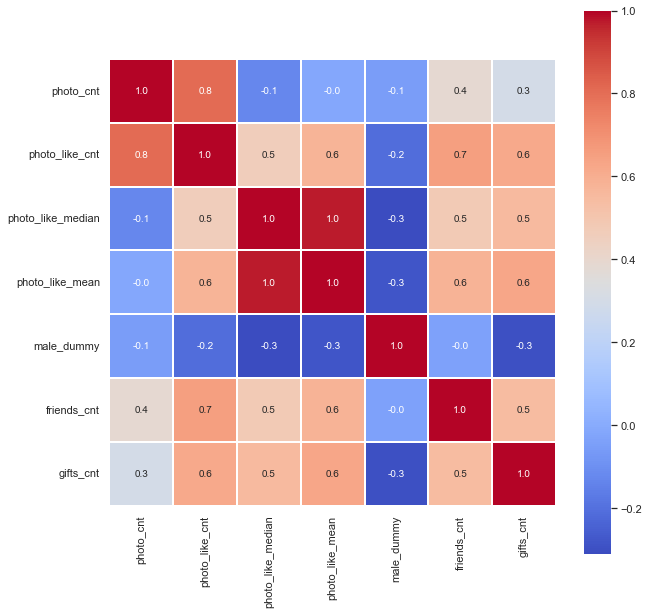

In [40]:
# Тут нужна картинка для датасета df_na_drop[vars_interesting]

plt.figure(figsize=(10, 10))
sns.heatmap(df_na_drop[vars_interesting].corr(method='pearson'),
            square = True,
            annot = True,
            fmt=".1f",
            linewidths=0.1,
            cmap="coolwarm"
            );

#### Задание 13 [2]

Насколько сильно корреляционные матрицы различаются между собой? Почему? 

__Ответ:__

- Каждая следующая матрица показывает все больше корреляций между признаками. Это логично: мы избавляемся от значений, которые сбивают наше распределение. Подтверждаются зависимости, которые мы заметили на pairplot.
- На первой матрице есть корреляция только между медианой и средним количества лайков.
- На второй матрице стала заметна корреляция количества лайков с их медианой и средним, а также с количеством фоток и друзей.
- На третьей матрице уже видна корреляция между всеми признаками из списка ['photo_cnt', 'photo_like_cnt', 'friends_cnt', gifts_cnt']

#### Задание 14 [2]

Между какими переменными корреляция самая высокая? Почему? Она отрицательная или положительная? Прокомментируйте все клетки, где она оказалась $\ge 0.3$ либо $\le -0.2$.

__Ответ:__

- Корреляция <= -0.2 для пары male_dummy с любым признаком. Это значит, что остальные признаки не зависят от пола.
- Корреляция >= 0.3 для всех пар из признаков ['photo_cnt', 'photo_like_cnt', 'friends_cnt', gifts_cnt']. Это подтверждает гипотезу о том, что между ними есть зависимость, близкая к линейной.

#### Задание 15 [2]

Дамми-переменная это переменная, которая принимает два значения. Либо $1$, если человек обладает закодированным в ней свойством, либо $0$, если не обладает. В нашей таблице все дамми-переменные оканчиваются на суффикc `dummy`.  

Возьмите переменную `instagram_dummy`. Она принимает значение $1$, если у пользователя на страничке есть ссылка на инстаграм. Возьмите переменную `male_dummy`. Она примает значение $1$, если пользователь парень. Постройте картинку, на которой будет видно как между собой соотносятся владельцы инстаграмма по полу.

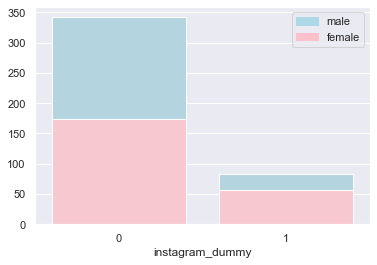

In [41]:
sns.barplot(x='instagram_dummy', y='uid', data=df, estimator = len, color="lightblue")
sns.barplot(x='instagram_dummy', y='uid', data=df[df['male_dummy'] == False], estimator = len, color="pink")

top_bar = mpatches.Patch(color='lightblue', label='male')
bottom_bar = mpatches.Patch(color='pink', label='female')
plt.ylabel("")
plt.legend(handles=[top_bar, bottom_bar])
plt.show()

Правда ли, что девушки чаще указыают наличие инстаграмма на своей страничке?

__Ответ:__ да, без сомнений

#### Задание 16 [1]

Категориальная переменная обычно принимает значения из какого-то фиксированного множества. Например, переменная `political_cat` описывает к какой категории относятся политические взгляды юзера. Постройте для этой переменной столбиковую диаграмму. Разберитесь по [документации](http://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot), как сделать у столбиков горизонтальное расположение.

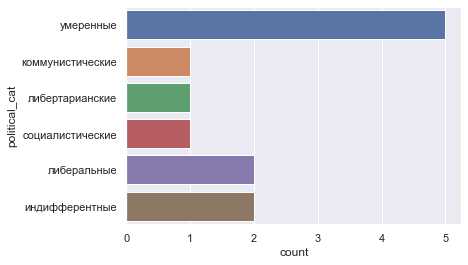

In [42]:
sns.countplot(y="political_cat", data=df)
plt.show()

Можно ли, исходя из картинки, сделать вывод, что в вышке одни либералы? Почему?

__Ответ:__ на картинке либералов отнюдь не большинство, но больше 99% юзеров политические взгляды на своей странице не отразили вообще, так что никаких выводов сделать нельзя.

#### Задание 17 [1]

Как политические взгляды распределены по полам?  Постройте для этого также столбиковую диаграмму, на которой каждый стобик будет разбит на два цвета: мужчины и женщины. 

__Ответ:__

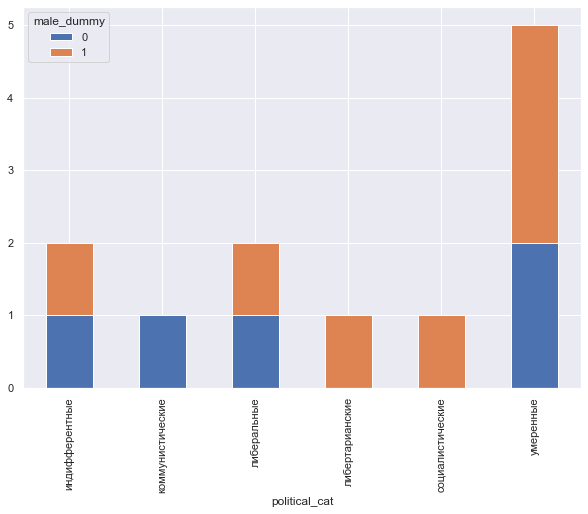

In [43]:
df_plot = df.groupby(['political_cat', 'male_dummy']).size().reset_index().pivot(index='political_cat', columns='male_dummy', values=0)
df_plot.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.show()

#### Задание 18 [2]

Есть ли связь между неграмотностью и рождаемостью? Для 94 стран, уровень неграмотности женщин в которых больше 5%, известны доля неграмотных среди женщин старше 15 (на 2003 год) и средняя рождаемость на одну женщину (на 2005 год).

illiteracy.txt - датасет

In [44]:
df = pd.read_csv('illiteracy.txt', sep='\t')
df.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [45]:
df.describe()

,Illit,Births
count,94.000000,94.000000
mean,31.473404,3.664787
std,22.348622,1.585262
min,5.400000,0.880000
25%,13.325000,2.392500
50%,22.650000,3.370000
75%,49.325000,4.960000
max,90.200000,7.670000


Чему равен выборочный коэффициент корреляции Пирсона между этими двумя признаками? Округлите до четырёх знаков после десятичной точки.

$$\rho_{xy} = \frac{Cov(x, y)}{\sigma_x \sigma_y} = \frac{ \overline{x \cdot y} - \overline{x} \cdot \overline{y} }{\sigma_x \sigma_y}$$

In [46]:
X, Y = df['Illit'], df['Births']
((X*Y).mean() - X.mean() * Y.mean()) / (X.std() * Y.std())

0.7604857608692729

In [47]:
format(pearsonr(X, Y)[0], '.4f')

'0.7687'

Чему равен выборочный коэффициент корреляции Спирмена признаков из предыдущего вопроса? Округлите до четырёх знаков после десятичной точки.

In [48]:
format(spearmanr(X, Y)[0], '.4f')

'0.7530'